In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv('emotion-labels-train.csv')
df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [3]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [4]:
df.shape

(3613, 2)

In [5]:
df.label.unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [6]:
label={'joy':0,'fear':1,'anger':2,'sadness':3}

df.label=[label[i] for i in df.label]
print(df['label'].unique())

[0 1 2 3]


In [7]:
tweets=df.copy()

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
wl=WordNetLemmatizer()
ps=PorterStemmer()
corpus=[]

for i in range(0,len(tweets)):
    process=re.sub('[^a-zA-Z]',' ',tweets['text'][i])
    process=process.lower()
    process=process.split()
    
    process=[wl.lemmatize(word) for word in process if word not in stopwords.words('english')]
    process=' '.join(process)
    corpus.append(process)

In [9]:
corpus

['got back seeing garydelaney burslem amazing face still hurt laughing much hilarious',
 'oh dear evening absolute hilarity think laughed much long time',
 'waiting week game cheer friday',
 'gardiner love thank much gloria sweet thoughtful made day joyful love',
 'feel blessed work family nanny nothing love amp appreciation make smile',
 'today reached subscriber yt goodday thankful',
 'singaholic good morning love happy first day fall let make awesome autumnmemories annabailey laughter smile',
 'bridgetjonesbaby best thing seen age funny missed bridget love teammark',
 'got back seeing garydelaney burslem amazing face still hurt laughing much',
 'indymn thought holiday could get cheerful met thenicebot',
 'still happy na blast',
 'meant happy happy',
 'yeah paul glorious bb',
 'morning started amazing hopefully whole day going want go n greatday',
 'cailamarsai whole time watching black ishabc lost glass hilarious mrbabyboogaloo',
 'iamtinadatta love much smile',
 'wyowiseguy livingv

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [11]:
vocab_size=5000
one_hot=[one_hot(words,vocab_size) for words in corpus]
one_hot

[[993, 3363, 2522, 2606, 2396, 89, 3524, 721, 1976, 770, 816, 3852],
 [2212, 847, 3941, 1277, 3539, 812, 3158, 816, 4702, 780],
 [855, 2622, 3932, 1066, 693],
 [4663, 4554, 4333, 816, 276, 1133, 1379, 683, 4241, 3268, 4554],
 [1594, 1754, 577, 1609, 3687, 2450, 4554, 35, 3506, 3447, 2974],
 [317, 434, 3, 3388, 2371, 1138],
 [1609,
  1035,
  2175,
  4554,
  4702,
  1999,
  4241,
  2088,
  3882,
  3447,
  2825,
  4558,
  4139,
  2107,
  2974],
 [138, 160, 1793, 4324, 4781, 2721, 4266, 568, 4554, 4023],
 [993, 3363, 2522, 2606, 2396, 89, 3524, 721, 1976, 770, 816],
 [806, 1950, 1833, 129, 2687, 2068, 3060, 3143],
 [721, 4702, 611, 580],
 [824, 4702, 4702],
 [1941, 2338, 18, 1817],
 [2175, 1411, 89, 622, 1662, 4241, 817, 430, 4378, 1787, 2065],
 [1161, 1662, 780, 1560, 1684, 4152, 3478, 477, 3852, 2862],
 [2388, 4554, 816, 2974],
 [1608, 4477, 1133, 914, 4169, 3557, 317, 1063, 4923, 1237, 3726, 3626, 1594],
 [4241, 3523, 4241, 4207, 1932, 4930],
 [3689, 4646, 1856, 4314, 914, 4492, 1960, 1

In [14]:
sent_len=30

embeddings = pad_sequences(one_hot,padding='post',maxlen=sent_len)
print(embeddings)

[[ 993 3363 2522 ...    0    0    0]
 [2212  847 3941 ...    0    0    0]
 [ 855 2622 3932 ...    0    0    0]
 ...
 [3342 2576  388 ...    0    0    0]
 [ 800  125 4362 ...    0    0    0]
 [ 140 4658 3794 ...    0    0    0]]


In [15]:
len(embeddings)

3613

In [18]:
embeddings[-1]

array([ 140, 4658, 3794, 4190, 1605, 4040, 4990,  404, 3545, 2589, 4474,
       2598, 3929, 4244,  362,  243, 4241, 3866,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [30]:
# Building Simple RNN model

from tensorflow.keras.models import Sequential
embedding_vector=40

model=Sequential([
    Embedding(vocab_size,embedding_vector,input_length=sent_len),
    tf.keras.layers.SimpleRNN(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                6720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [21]:
y=tweets.label

In [23]:
x=np.array(embeddings)
y=np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
X_train.shape,X_test.shape

((2890, 30), (723, 30))

In [27]:
y_train.shape,y_test.shape

((2890,), (723,))

In [31]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64,verbose=2)

Epoch 1/15
46/46 - 9s - loss: 1.3798 - accuracy: 0.3090 - val_loss: 1.3746 - val_accuracy: 0.3292
Epoch 2/15
46/46 - 6s - loss: 1.3779 - accuracy: 0.3145 - val_loss: 1.3744 - val_accuracy: 0.3292
Epoch 3/15
46/46 - 7s - loss: 1.3764 - accuracy: 0.3145 - val_loss: 1.3741 - val_accuracy: 0.3292
Epoch 4/15
46/46 - 5s - loss: 1.3769 - accuracy: 0.3145 - val_loss: 1.3737 - val_accuracy: 0.3292
Epoch 5/15
46/46 - 6s - loss: 1.3764 - accuracy: 0.3145 - val_loss: 1.3741 - val_accuracy: 0.3292
Epoch 6/15
46/46 - 6s - loss: 1.3756 - accuracy: 0.3145 - val_loss: 1.3739 - val_accuracy: 0.3292
Epoch 7/15
46/46 - 7s - loss: 1.3753 - accuracy: 0.3145 - val_loss: 1.3740 - val_accuracy: 0.3292
Epoch 8/15
46/46 - 6s - loss: 1.3768 - accuracy: 0.3145 - val_loss: 1.3731 - val_accuracy: 0.3292
Epoch 9/15
46/46 - 7s - loss: 1.3759 - accuracy: 0.3145 - val_loss: 1.3730 - val_accuracy: 0.3292
Epoch 10/15
46/46 - 6s - loss: 1.3760 - accuracy: 0.3145 - val_loss: 1.3725 - val_accuracy: 0.3292
Epoch 11/15
46/46 -

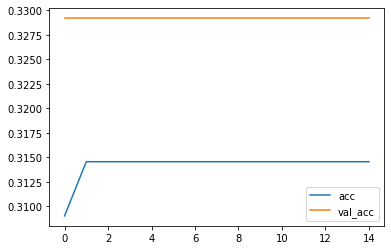

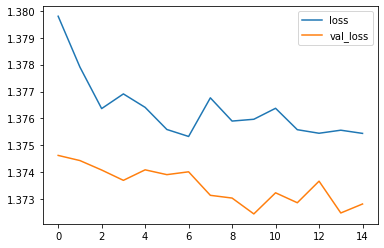

In [33]:
# plot accuracy vs validation accuracy

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,label='acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.legend()
plt.figure()


plt.plot(epochs,loss,label='loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()
plt.show()

## As expected using Simple RNN its accuracy is low

In [38]:
# let's try with LSTM's and Bidirectional RNN

model=Sequential([
    Embedding(vocab_size,embedding_vector,input_length=sent_len),
    LSTM(512,return_sequences=True),
    LSTM(512,return_sequences=True),
    tf.keras.layers.Bidirectional(LSTM(256,activation='tanh')),
    tf.keras.layers.Dropout(0.2),
    Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 512)           1132544   
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 512)           2099200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [39]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=2)

Epoch 1/15
46/46 - 33s - loss: 1.3796 - accuracy: 0.3045 - val_loss: 1.3552 - val_accuracy: 0.3665
Epoch 2/15
46/46 - 19s - loss: 1.1272 - accuracy: 0.4612 - val_loss: 1.1271 - val_accuracy: 0.4827
Epoch 3/15
46/46 - 19s - loss: 0.8307 - accuracy: 0.6145 - val_loss: 1.1880 - val_accuracy: 0.4564
Epoch 4/15
46/46 - 19s - loss: 0.6688 - accuracy: 0.7249 - val_loss: 1.5002 - val_accuracy: 0.5463
Epoch 5/15
46/46 - 19s - loss: 0.5703 - accuracy: 0.7779 - val_loss: 1.2340 - val_accuracy: 0.5698
Epoch 6/15
46/46 - 19s - loss: 0.3484 - accuracy: 0.8689 - val_loss: 1.5750 - val_accuracy: 0.6030
Epoch 7/15
46/46 - 19s - loss: 0.2387 - accuracy: 0.9235 - val_loss: 1.7608 - val_accuracy: 0.6183
Epoch 8/15
46/46 - 19s - loss: 0.1809 - accuracy: 0.9460 - val_loss: 1.3196 - val_accuracy: 0.6404
Epoch 9/15
46/46 - 19s - loss: 0.1261 - accuracy: 0.9633 - val_loss: 1.8141 - val_accuracy: 0.6349
Epoch 10/15
46/46 - 19s - loss: 0.1055 - accuracy: 0.9685 - val_loss: 1.7446 - val_accuracy: 0.6293
Epoch 11/

In [40]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 2s 102ms/step - loss: 1.8503 - accuracy: 0.6390


[1.850291132926941, 0.6390041708946228]

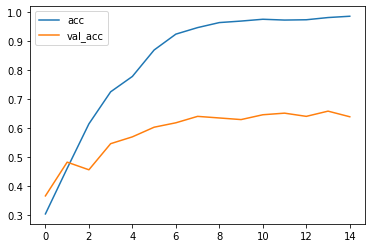

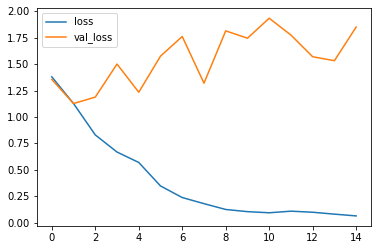

In [41]:
# plot accuracy vs validation accuracy

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,label='acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.legend()
plt.figure()


plt.plot(epochs,loss,label='loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()
plt.show()

In [43]:
model.save('saved-LSTM-model/')

INFO:tensorflow:Assets written to: saved-LSTM-model/assets


INFO:tensorflow:Assets written to: saved-LSTM-model/assets


## Now model got better accuracy than before

1. 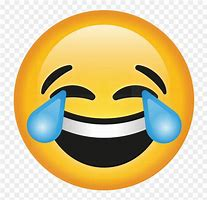

2. 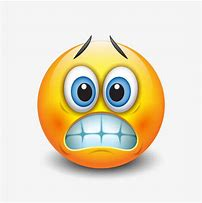

3. 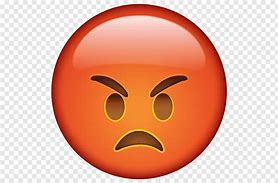

4. 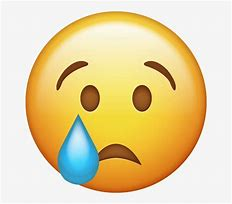